In [15]:
# Install required packages
!pip install pandas sqlalchemy matplotlib

# Import libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [16]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display dataset info
print("=== DATASET INFORMATION ===")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nMissing values:")
print(df.isna().sum())

=== DATASET INFORMATION ===
Shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Column names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# Fill missing ages with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column (too many missing values)
df = df.drop(columns=['Cabin'])

# Verify changes
print("\nMissing values after cleaning:")
print(df.isna().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [19]:
# Fill missing ages with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Verify changes
print("\nMissing values after cleaning:")
print(df.isna().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [20]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 12, 18, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'Senior'])

# Create title feature from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 12, 18, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'Senior'])

# Create title feature from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
df.to_csv('cleaned_titanic.csv', index=False)
from google.colab import files
files.download('cleaned_titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Create in-memory SQLite database
engine = create_engine('sqlite:///:memory:')

# Load data to SQL
df.to_sql('titanic', engine, index=False, if_exists='replace')

# Test query
query = '''
SELECT
    Pclass,
    Sex,
    AVG(Survived) as SurvivalRate,
    COUNT(*) as Passengers
FROM titanic
GROUP BY Pclass, Sex
ORDER BY SurvivalRate DESC
'''

results = pd.read_sql(query, engine)
display(results)

,Pclass,Sex,SurvivalRate,Passengers
0,1,female,0.968085,94
1,2,female,0.921053,76
2,3,female,0.500000,144
3,1,male,0.368852,122
4,2,male,0.157407,108
5,3,male,0.135447,347


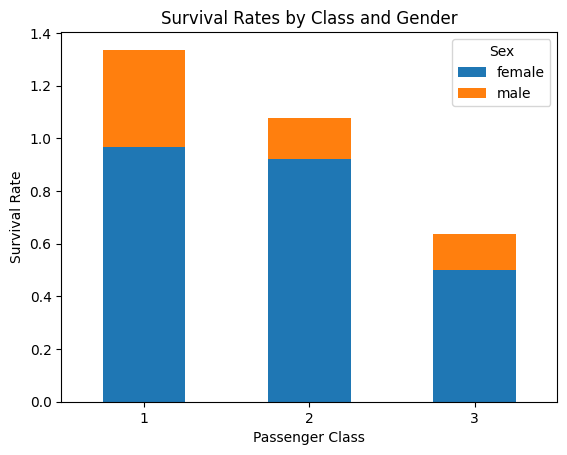

In [24]:
# Plot survival rates by class and gender
survival_rates = results.pivot(index='Pclass', columns='Sex', values='SurvivalRate')
survival_rates.plot(kind='bar', stacked=True)
plt.title('Survival Rates by Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)
plt.show()

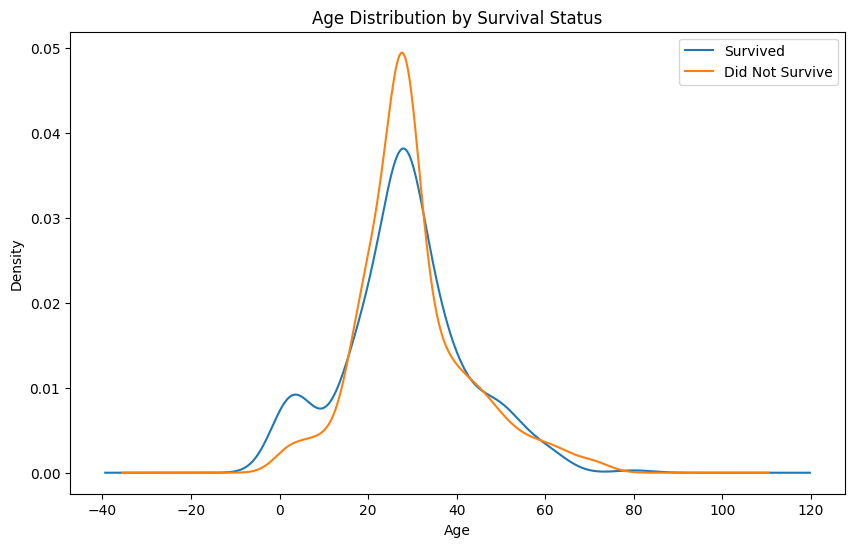

In [25]:
# Plot age distribution of survivors vs non-survivors
plt.figure(figsize=(10, 6))
df[df['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label='Did Not Survive')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.legend()
plt.show()